In [1]:
%matplotlib inline

In [34]:
def make_image(filepath,outdir=None,coord=None,size=0.03,plotname=None, stretch='log', vmin=None, vmax=None,
               bar_size=30, aper=None, int_unit='MJy/sr', text=None, scalebar=True, framecolor='white'):
    """
    size in degree
    """
    import numpy as np
    import aplpy as apl
    import matplotlib
    import matplotlib.pyplot as plt
    from astropy import units as u
    from astropy.coordinates import SkyCoord
#     matplotlib.use('Agg')
    import os

    mag = 1.5
    if coord == None:
        # Coordinates of BHR71:
        ra_cen  = 180.403375
        dec_cen = -65.14700556
    else:
        ra_cen = coord[0]
        dec_cen = coord[1]

    # source coordinate from Chen 2008
    # 12 01 36.81  -65 08 49.22
#     c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
#     print c
    

    # At 178 pc, 10000 AU correspond to 57.96 arcsec
    
    im = apl.FITSFigure(filepath,north=True)
    im.frame.set_linewidth(2)
    im.frame.set_color(framecolor)
    cmap = plt.cm.CMRmap
#     cmap = plt.cm.viridis
    im.show_colorscale(cmap=cmap,stretch=stretch, vmin=vmin, vmax=vmax)
    
    im.recenter(ra_cen,dec_cen,radius=size)

#     im.show_markers(c.ra.degree, c.dec.degree, marker='+', c='deepskyblue', s=120, linewidth=2)
    
    # source coordinate from Chen 2008
    # 12 01 36.81  -65 08 49.22
    irs1 = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
    im.show_markers(irs1.ra.degree, irs1.dec.degree, marker='+', c='deepskyblue', s=120, linewidth=2)
    # add label for BHR71 IRS2
    irs2 = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))
    im.show_markers(irs2.ra.degree, irs2.dec.degree, marker='+', c='w', s=120, linewidth=2)
#     im.add_grid()
#     im.grid.set_xspacing(size/5.)
#     im.grid.set_yspacing(size/5.)
#     im.grid.set_color('green')
    im.set_nan_color('black')
    im.tick_labels.set_font(size=22)
    # im.set_grid_alpha(0.2)

    im.add_colorbar()
    im.colorbar.set_font(size=20)
    im.colorbar.set_axis_label_text('Intensity ('+int_unit+')')
    im.colorbar.set_axis_label_font(size=24)
    im.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
    im.ticks.set_xspacing(size/2.5)
    im.ticks.set_yspacing(size/2.5)
    im.axis_labels.set_font(size=26)
    im.ticks.set_linewidth(2)
    im.ticks.set_color(framecolor)
    
    im.add_scalebar(bar_size/3600.)
    im.scalebar.set_length(bar_size * u.arcsecond)
    im.scalebar.set_label(r'$\rm{'+str(bar_size)+'\,arcsec}$')
    im.scalebar.set_font(size=22, weight='bold')
    im.scalebar.set(linestyle='solid', color='w', linewidth=3, corner='bottom')
    if not scalebar:
        # hide the scalebar
        im.scalebar.hide()
    
    # print image information
    if text != None:
        im.add_label(0.85, 0.92, text, size='xx-large', weight='bold', relative=True, color='w')
    
    # plot a circular region for aperture
    if aper != None:
        im.show_circles([ra_cen], [dec_cen], [aper/3600.], color='lime', linewidth=3)
        im.show_circles([ra_cen], [dec_cen], [41253/200./3600.], color='lime', linewidth=3, linestyle='--')
    
    plotdir = os.path.dirname(filepath)
    if plotname == None:
        plotname = raw_input('What is the plot name: ')
        print plotname
    im.save(plotdir+'/'+plotname+'.pdf',format='pdf',transparent=True, dpi=300)


In [6]:
irac1 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC1_mosaic.fits'
irac2 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC2_mosaic.fits'
irac3 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC3_mosaic.fits'
irac4 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC4_mosaic.fits'

<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpn54uXj [montage_wrapper.wrappers]
INFO: Auto-setting vmin to  1.515e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.118e+01 [aplpy.core]


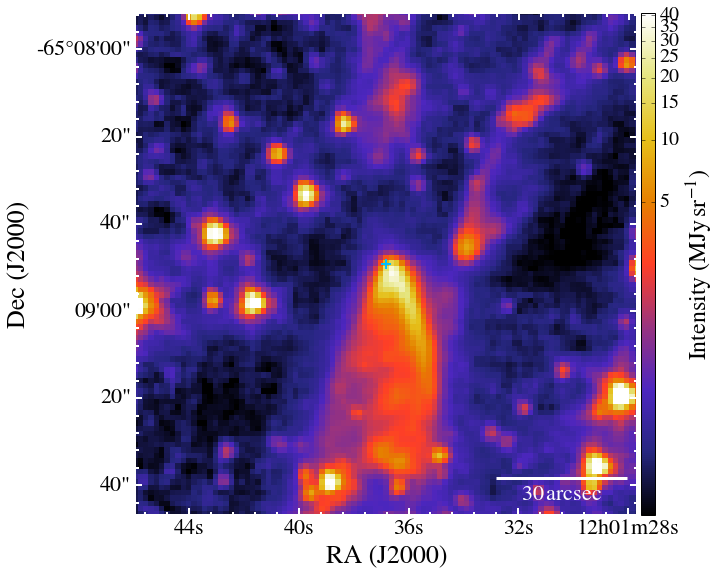

In [142]:
make_image(irac1, plotname='IRAC1', int_unit=r'$\rm{MJy\,sr^{-1}}$', size=0.016, bar_size=30)

In [ ]:
path = [irac1,irac2,irac3,irac4]
for ipath in path:
    make_image(ipath)

In [169]:
from astropy.io import fits
import matplotlib.pyplot as plt
hdu = fits.open(spire500)
im = hdu[1].data
hdr = hdu[1].header
new_hdu = fits.PrimaryHDU(im, header=hdr)
new_hdu.writeto('/Users/yaolun/test/spire500_compressed.fits', clobber=True)

In [176]:
vlt1 = '/Users/yaolun/bhr71/data/photometry/VLT/VLT1.fits'
vlt2 = '/Users/yaolun/bhr71/data/photometry/VLT/VLT2.fits'
vlt3 = '/Users/yaolun/bhr71/data/photometry/VLT/VLT3.fits'

## Spitzer Image

INFO: Deleting work directory /var/folders/8l/wkm05hxn2qlc5vlkg7m35rzw0008sh/T/tmpk1zcip [montage_wrapper.wrappers]
INFO: Deleting work directory /var/folders/8l/wkm05hxn2qlc5vlkg7m35rzw0008sh/T/tmpO_XwrS [montage_wrapper.wrappers]
INFO: Deleting work directory /var/folders/8l/wkm05hxn2qlc5vlkg7m35rzw0008sh/T/tmpwj_Ztd [montage_wrapper.wrappers]
INFO: Red: [aplpy.rgb]
INFO: vmin =  1.640e+00 (auto) [aplpy.rgb]
INFO: vmax =  2.718e+01 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin = -4.998e-03 (auto) [aplpy.rgb]
INFO: vmax =  2.973e+01 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  1.520e-01 (auto) [aplpy.rgb]
INFO: vmax =  4.131e+01 (auto) [aplpy.rgb]


/Users/yaolun/anaconda/envs/py2/lib/python2.7/site-packages/aplpy/rgb.py:218: UserWarning: PyAVM 0.9.1 or later is not installed, so AVM tags will not be embedded in RGB image
  warnings.warn("PyAVM 0.9.1 or later is not installed, so AVM tags will not be embedded in RGB image")
/Users/yaolun/anaconda/envs/py2/lib/python2.7/site-packages/aplpy/labels.py:158: UserWarning: latex has now been merged with plain - whether or not to use LaTeX is controlled through set_system_latex
  warnings.warn("latex has now been merged with plain - whether or not to use LaTeX is controlled through set_system_latex")


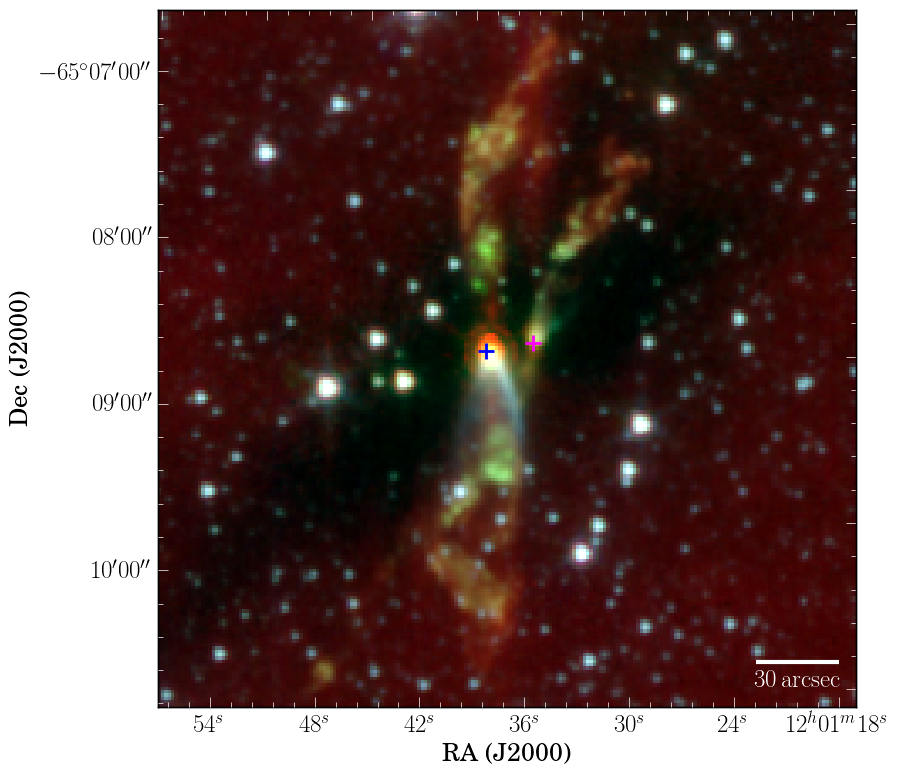

In [8]:
import aplpy
from astropy import units as u
from astropy.coordinates import SkyCoord

# Coordinates of BHR71:
ra_cen  = 180.3985138
dec_cen = -65.14783478

# Making a FITS cube with Montage. Data of different projections, field
# of view, and resolution will be modified to match one another for
# compositing.

aplpy.make_rgb_cube([irac4, irac2, irac1],'/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_irac_comb.fits')
# aplpy.make_rgb_cube([vlt3, vlt2, vlt1],'/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_irac_comb.fits', north=True)

# Now that the data cube is created, we can make a color image from the data for plotting.

aplpy.make_rgb_image('/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_irac_comb.fits','test_irac.tif',
                     stretch_r='arcsinh',stretch_g='arcsinh',stretch_b='arcsinh')

img = aplpy.FITSFigure('/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_irac_comb_2d.fits')
img.show_rgb('test.tif',flip=True)

img.recenter(ra_cen,dec_cen,width=0.07,height=0.07)

# source coordinate from Chen 2008
# 12 01 36.81  -65 08 49.22
c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='b', s=120, linewidth=2)
# add label for BHR71 IRS2
c = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='Magenta', s=120, linewidth=2)

# img.add_grid()
# img.grid.set_xspacing(0.05/5.)
# img.grid.set_yspacing(0.05/5.)
# # img.grid.set_color('green')
# img.set_nan_color('black')
img.tick_labels.set_font(size=18)
# setting for scalebar

img.add_scalebar(30/3600.)
img.scalebar.set_length(30 * u.arcsecond)
img.scalebar.set_label(r'$\rm{30\,arcsec}$')
img.scalebar.set_font(size=18)
img.scalebar.set(linestyle='solid', color='white', linewidth=3)

img.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
img.axis_labels.set_font(size=18)
img.set_tick_color('white')
img.set_tick_labels_style('latex')
img.set_labels_latex(True)

img.save('bhr71_irac.pdf', format='pdf', dpi=300)

## 2MASS Image

In [1]:
twomass_j = '/Users/yaolun/bhr71/data/photometry/2mass_j_band.fits'
twomass_h = '/Users/yaolun/bhr71/data/photometry/2mass_h_band.fits'
twomass_k = '/Users/yaolun/bhr71/data/photometry/2mass_k_band.fits'

In [ ]:
import aplpy
from astropy import units as u
from astropy.coordinates import SkyCoord

# Coordinates of BHR71:
ra_cen  = 180.3985138
dec_cen = -65.14783478

# Making a FITS cube with Montage. Data of different projections, field
# of view, and resolution will be modified to match one another for
# compositing.

aplpy.make_rgb_cube([twomass_k, twomass_h, twomass_j],'/Users/yaolun/bhr71/data/photometry/2mass_comb.fits')

# Now that the data cube is created, we can make a color image from the data for plotting.

aplpy.make_rgb_image('/Users/yaolun/bhr71/data/photometry/2mass_comb.fits','test_2mass.tif',
                     stretch_r='arcsinh',stretch_g='arcsinh',stretch_b='arcsinh')

img = aplpy.FITSFigure('/Users/yaolun/bhr71/data/photometry/2mass_comb_2d.fits')
img.show_rgb('test_2mass.tif',flip=True)

img.recenter(ra_cen,dec_cen,width=0.04,height=0.04)

# source coordinate from Chen 2008
# 12 01 36.81  -65 08 49.22
c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='b', s=120, linewidth=2)
# add label for BHR71 IRS2
c = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='Magenta', s=120, linewidth=2)

# img.add_grid()
# img.grid.set_xspacing(0.05/5.)
# img.grid.set_yspacing(0.05/5.)
# # img.grid.set_color('green')
# img.set_nan_color('black')
img.tick_labels.set_font(size=18)
# setting for scalebar

img.add_scalebar(30/3600.)
img.scalebar.set_length(30 * u.arcsecond)
img.scalebar.set_label(r'$\rm{30\,arcsec}$')
img.scalebar.set_font(size=18)
img.scalebar.set(linestyle='solid', color='white', linewidth=3)

img.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
img.axis_labels.set_font(size=18)
img.set_tick_color('white')
img.set_tick_labels_style('latex')
img.set_labels_latex(True)

img.save('bhr71_2mass.pdf', format='pdf', dpi=300)

## Herschel-PACS image

In [9]:
datadir = '/Users/yaolun/bhr71/data/photometry/herschel_photometry/'
pacs70 = datadir+'/1342224922/level2/HPPPMAPB/hpacs1342224922_20hpppmapb_00_1431606963402.fits'
pacs100 = datadir+'/1342224924/level2/HPPPMAPB/hpacs1342224924_20hpppmapb_00_1431607760123.fits'
pacs160 = datadir+'/1342224922/level2/HPPPMAPR/hpacs1342224922_20hpppmapr_00_1431606963820.fits'
c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))

INFO: Deleting work directory /var/folders/8l/wkm05hxn2qlc5vlkg7m35rzw0008sh/T/tmpULMQwb [montage_wrapper.wrappers]


/Users/yaolun/anaconda/envs/py2/lib/python2.7/site-packages/aplpy/ticks.py:79: UserWarning: WARNING: Requested tick spacing format cannot be shown by current label format. The tick spacing will not be changed.
  warnings.warn("WARNING: Requested tick spacing format cannot be shown by current label format. The tick spacing will not be changed.")
/Users/yaolun/anaconda/envs/py2/lib/python2.7/site-packages/aplpy/ticks.py:114: UserWarning: WARNING: Requested tick spacing format cannot be shown by current label format. The tick spacing will not be changed.
  warnings.warn("WARNING: Requested tick spacing format cannot be shown by current label format. The tick spacing will not be changed.")


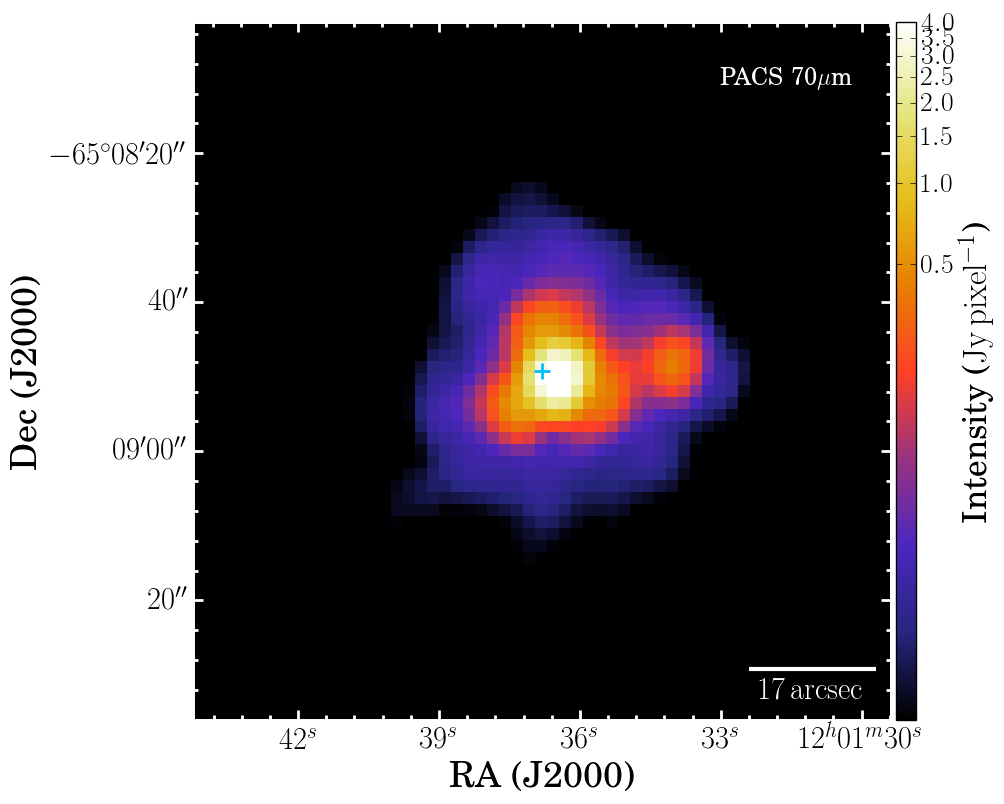

In [10]:
make_image(pacs70, plotname='pacs70_log', stretch='log', int_unit=r'$\rm{Jy\,pixel^{-1}}$',
           size=0.013, bar_size=17, vmin=0.01, vmax=4.0, text='PACS 70$\mu$m')

### PACS 70$\mu m$ image to illustrate the regions used for 1-D spectrum extraction

In [25]:
spire500 = '/Users/yaolun/bhr71/data/photometry/herschel_photometry/1342226633/level2/extdPLW/hspireplw1342226633_20pxmp_1431669349619.fits'
from astropy.io import fits
hdu = fits.open(spire500)
print np.nanmin(hdu[1].data), np.nanmax(hdu[1].data)

17.0207073151 887.433026715


INFO: Deleting work directory /var/folders/8l/wkm05hxn2qlc5vlkg7m35rzw0008sh/T/tmpYBrOi9 [montage_wrapper.wrappers]


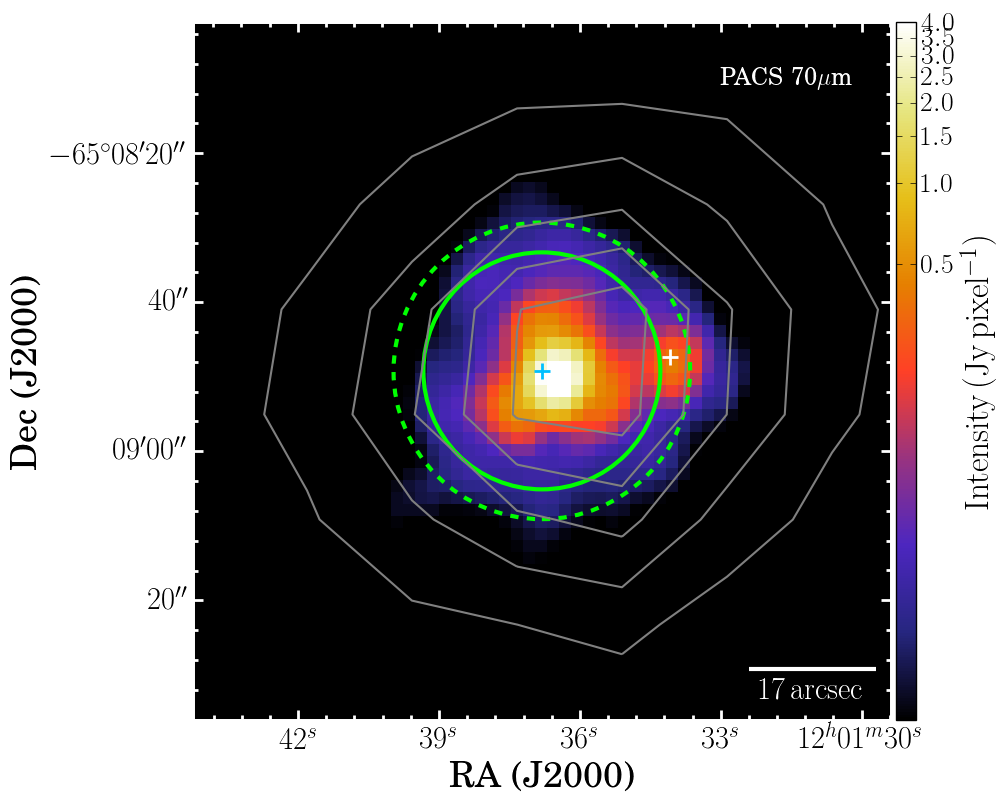

In [32]:
import numpy as np
import aplpy as apl
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord

im = apl.FITSFigure(pacs70,north=True)
im.frame.set_linewidth(2)
im.frame.set_color('white')
cmap = plt.cm.CMRmap
im.show_colorscale(cmap=cmap,stretch='log', vmin=0.01, vmax=4.0)

# show SPIRE 500 um contour
im.show_contour('/Users/yaolun/bhr71/data/photometry/herschel_photometry/1342226633/level2/extdPLW/hspireplw1342226633_20pxmp_1431669349619.fits',
                colors='grey', levels=[50,200,350,500,650,800], linewidths=1.5)

# source coordinate from Chen 2008
# 12 01 36.81  -65 08 49.22
irs1 = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
im.show_markers(irs1.ra.degree, irs1.dec.degree, marker='+', c='deepskyblue', s=120, linewidth=2)
# add label for BHR71 IRS2
irs2 = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))
im.show_markers(irs2.ra.degree, irs2.dec.degree, marker='+', c='w', s=120, linewidth=2)

im.recenter(irs1.ra.degree, irs1.dec.degree,radius=0.013)

im.set_nan_color('black')
im.tick_labels.set_font(size=22)

im.add_colorbar()
im.colorbar.set_font(size=20)
im.colorbar.set_axis_label_text(r'$\rm{Intensity\,(Jy\,pixel^{-1})}$')
im.colorbar.set_axis_label_font(size=24)
im.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
im.ticks.set_xspacing(0.013/2.5)
im.ticks.set_yspacing(0.013/2.5)
im.axis_labels.set_font(size=26)
im.ticks.set_linewidth(2)
im.ticks.set_color('white')

im.add_scalebar(17/3600.)
im.scalebar.set_length(17 * u.arcsecond)
im.scalebar.set_label(r'$\rm{17\,arcsec}$')
im.scalebar.set_font(size=22, weight='bold')
im.scalebar.set(linestyle='solid', color='w', linewidth=3, corner='bottom')


# print image information
im.add_label(0.85, 0.92, 'PACS 70$\mu$m', size='xx-large', weight='bold', relative=True, color='w')

# plot a circular region for aperture

im.show_circles([irs1.ra.degree], [irs1.dec.degree], [31.8/2./3600.], color='lime', linewidth=3)
im.show_circles([irs1.ra.degree], [irs1.dec.degree], [39.8/2./3600.], color='lime', linewidth=3, linestyle='--')


im.save('/Users/yaolun/Dropbox/bhr71/for_submission/figures/pacs70_wApertures.pdf',format='pdf',transparent=True, dpi=300)


INFO: Deleting work directory /var/folders/8l/wkm05hxn2qlc5vlkg7m35rzw0008sh/T/tmpPZ84FE [montage_wrapper.wrappers]


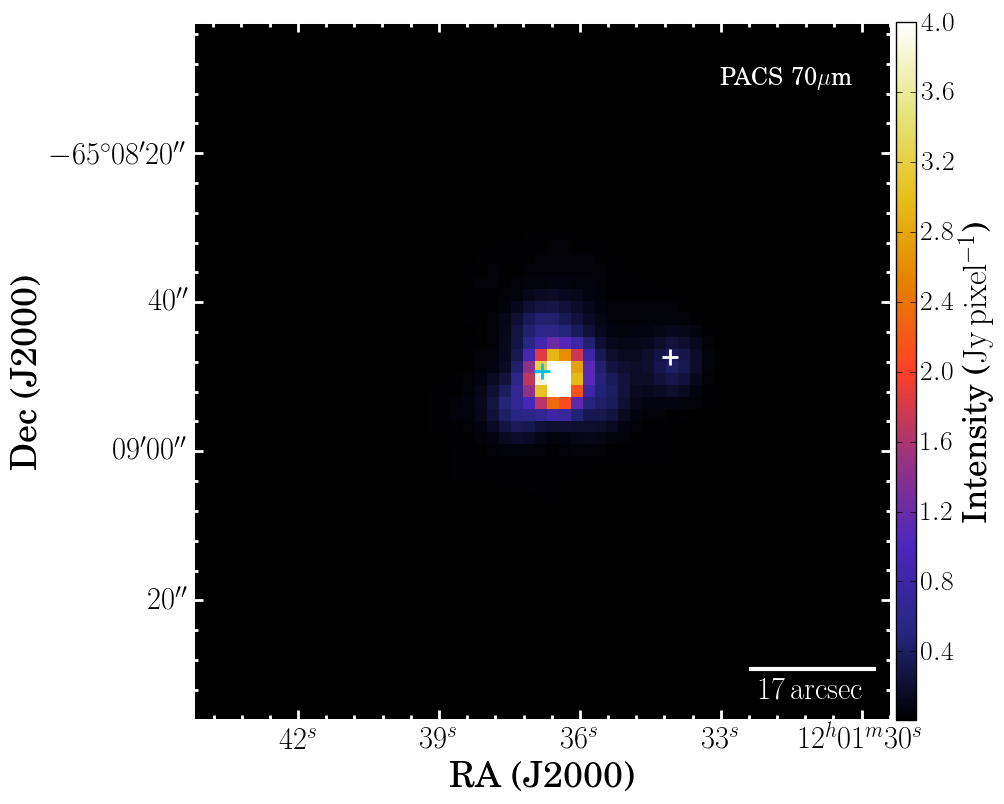

In [35]:
make_image(pacs70, plotname='pacs70_linear', stretch='linear', int_unit=r'$\rm{Jy\,pixel^{-1}}$',
           size=0.013, bar_size=17, vmin=0.01, vmax=4.0, text='PACS 70$\mu$m')

<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>


INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpB8nAMh [montage_wrapper.wrappers]
INFO: Auto-setting vmax to  1.261e+00 [aplpy.core]


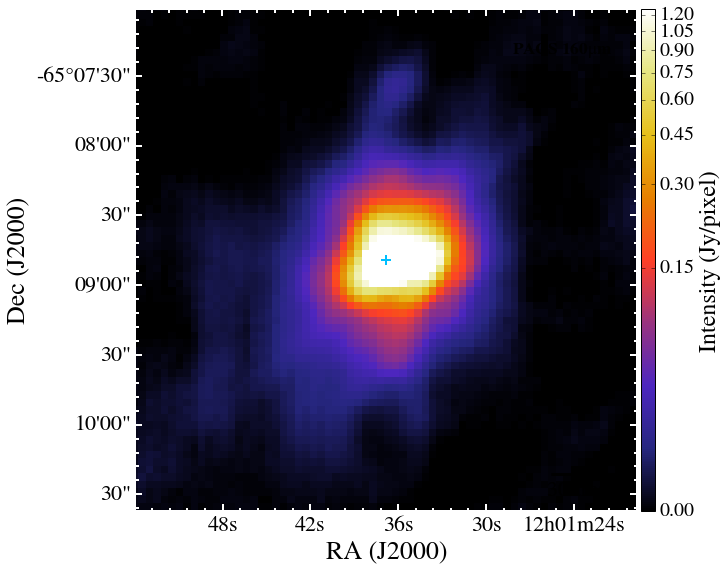

In [23]:
# make_image(pacs70, plotname='pacs70', stretch='arcsinh', int_unit='Jy/pixel', vmin=0, aper=100, text='PACS 70$\mu$m')
# make_image(pacs100, plotname='pacs100', stretch='arcsinh', int_unit='Jy/pixel', vmin=0, aper=100, text='PACS 100$\mu$m')
make_image(pacs160, plotname='pacs160', stretch='arcsinh', int_unit='Jy/pixel', vmin=0, text='PACS 160$\mu$m')
# make_image(pacs160, plotname='pacs160', stretch='log', int_unit=r'$\rm{Jy\,pixel^{-1}}$', vmin=0.01,
#            size=0.1, bar_size=100, text='PACS 160$\mu$m', framecolor='k')

INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmplwJ0Ri [montage_wrapper.wrappers]


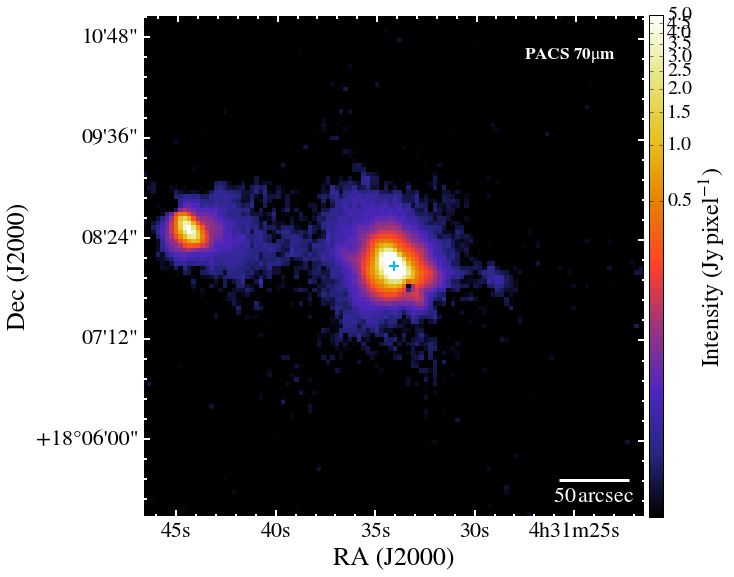

In [16]:
# L1551-IRS5
pacs70 = '/Volumes/SD-Mac/L1551-IRS5/1342202250/level2/HPPPMAPB/hpacs1342202250_20hpppmapb_00_1452930831094.fits'

from astropy.coordinates import SkyCoord
from astropy import units as u 
c = SkyCoord('4 31 34.1 +18 8 4.8', unit=(u.hourangle, u.deg))

make_image(pacs70, plotname='L1551-IRS5_pacs70', stretch='log', int_unit=r'$\rm{Jy\,pixel^{-1}}$',
           size=0.05, bar_size=50, vmin=0.01, vmax=5, text='PACS 70$\mu$m', coord=[c.ra.degree,c.dec.degree])

In [ ]:
import aplpy
from astropy import units as u
from astropy.coordinates import SkyCoord

# Coordinates of BHR71:
ra_cen  = 180.3985138
dec_cen = -65.14783478

# Making a FITS cube with Montage. Data of different projections, field
# of view, and resolution will be modified to match one another for
# compositing.

aplpy.make_rgb_cube([pacs70, pacs100, pacs160],'/Users/yaolun/bhr71/data/photometry/herschel_pacs_comb.fits')

# Now that the data cube is created, we can make a color image from the data for plotting.

aplpy.make_rgb_image('/Users/yaolun/bhr71/data/photometry/herschel_pacs_comb.fits','test_pacs.tif',
                     stretch_r='arcsinh',stretch_g='arcsinh',stretch_b='arcsinh')

img = aplpy.FITSFigure('/Users/yaolun/bhr71/data/photometry/herschel_pacs_comb_2d.fits')
img.show_rgb('test.tif',flip=True)

img.recenter(ra_cen,dec_cen,width=0.05,height=0.05)

# source coordinate from Chen 2008
# 12 01 36.81  -65 08 49.22
c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='b', s=120, linewidth=2)
# add label for BHR71 IRS2
c = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='Magenta', s=120, linewidth=2)

# img.add_grid()
# img.grid.set_xspacing(0.05/5.)
# img.grid.set_yspacing(0.05/5.)
# # img.grid.set_color('green')
# img.set_nan_color('black')
img.tick_labels.set_font(size=18)
# setting for scalebar

img.add_scalebar(30/3600.)
img.scalebar.set_length(30 * u.arcsecond)
img.scalebar.set_label(r'$\rm{30\,arcsec}$')
img.scalebar.set_font(size=18)
img.scalebar.set(linestyle='solid', color='white', linewidth=3)

img.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
img.axis_labels.set_font(size=18)
img.set_tick_color('white')
img.set_tick_labels_style('latex')
img.set_labels_latex(True)

img.save('bhr71_pacs.pdf', format='pdf', dpi=300)

## Herschel-SPIRE image

In [67]:
datadir = '/Users/yaolun/bhr71/data/photometry/herschel_photometry/'
# spire250 = datadir+'1342226633/level2/extdPSW/hspirepsw1342226633_20pxmp_1431669350548.fits'
# spire350 = datadir+'1342226633/level2/extdPMW/hspirepmw1342226633_20pxmp_1431669350070.fits'
# spire500 = datadir+'1342226633/level2/extdPLW/hspireplw1342226633_20pxmp_1431669349619.fits'
datadir = '/Users/yaolun/test/'
spire250 = datadir+'extdPSW_jypx.fits'
spire350 = datadir+'extdPMW_jypx.fits'
spire500 = datadir+'extdPLW_jypx.fits'

<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpf6qfWy [montage_wrapper.wrappers]


INFO: Auto-setting vmin to  8.179e-02 [aplpy.core]


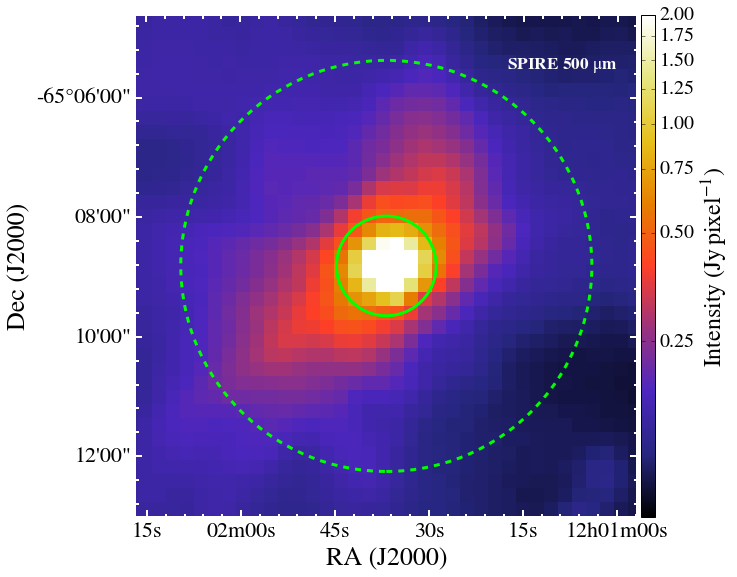

In [103]:
# make_image(spire250, plotname='spire250', stretch='arcsinh', size=0.06, bar_size=100,
#            aper=100, int_unit=r'$\rm{Jy\,pixel^{-1}}$', text='SPIRE 250$\mu$m')
# make_image(spire350, plotname='spire350', stretch='arcsinh', size=0.06, bar_size=100,
#            aper=100, int_unit=r'$\rm{Jy\,pixel^{-1}}$', text='SPIRE 350$\mu$m')
make_image(spire500, plotname='spire500', stretch='log', size=0.07, bar_size=100, scalebar=False,
           int_unit=r'$\rm{Jy\,pixel^{-1}}$', text='SPIRE 500 $\mu$m', aper=50, vmax=2.0)

In [49]:
fuori_111 = ['/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g1/F0272_FO_IMA_0401463_FORF111_CAL_0026-0027.fits',
             '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g6/F0272_FO_IMA_040146163_FORF111_CAL_0032.fits',
             '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g6/F0272_FO_IMA_040146163_FORF111_CAL_0033.fits',
             '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g7/F0272_FO_IMA_040146163_FORF111_CAL_0091.fits',
             '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g7/F0272_FO_IMA_040146163_FORF111_CAL_0092.fits',
             '/Users/yaolun/Dropbox/2016-02-18_FO_F279/p1456/F0279_FO_IMA_040146163_FORF111_CAL_0014.fits',
             '/Users/yaolun/Dropbox/2016-02-18_FO_F279/p1456/F0279_FO_IMA_040146163_FORF111_CAL_0015.fits']
wave_111 = 111

fuori = ['/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g2/F0272_FO_IMA_0401463_FORF348_CAL_0026-0027.fits',
         '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g3/F0272_FO_IMA_040146166_FORF315_CAL_0030-0031.fits',
         '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g4/F0272_FO_IMA_0401461_FORF056_CAL_0022-0023.fits',
         '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g5/F0272_FO_IMA_0401462_FORF077_CAL_0024-0025.fits',
         '/Users/yaolun/Dropbox/2016-02-04_FO_F272/p1410/g8/F0272_FO_IMA_040146165_FORF253_CAL_0028-0029.fits']
wave = [348,315,56,77,253]

In [ ]:
# from astropy.coordinates import SkyCoord
from astropy import units as u 
c = SkyCoord('5 45 22.4 +9 4 12.4', unit=(u.hourangle, u.deg))

for filepath in fuori:
    make_image(filepath, plotname='FUOri_'+str(wave[fuori.index(filepath)])+'reg', stretch='log', size=0.01,
               coord=[c.ra.degree,c.dec.degree], int_unit=r'$\rm{Jy\,pixel^{-1}}$',
               text='FORCAST '+str(wave[fuori.index(filepath)]/10.)+' $\mu$m', vmin=0.01, vmax=0.2, bar_size=10)

In [ ]:
for filepath in fuori_111:
    make_image(filepath, plotname='FUOri_111reg', stretch='log', size=0.01,
               coord=[c.ra.degree,c.dec.degree], int_unit=r'$\rm{Jy\,pixel^{-1}}$',
               text='FORCAST 11.1 $\mu$m', vmin=0.01, vmax=0.2, bar_size=10)

## optical image with PACS/SPIRE footprint

In [51]:
# SPIRE SLW pixel name
pixelname_slw = ['SLWA1','SLWA2','SLWA3','SLWB1','SLWB2',
                 'SLWB3','SLWB4','SLWC1','SLWC2','SLWC3',
                 'SLWC4','SLWC5','SLWD1','SLWD2','SLWD3',
                 'SLWD4','SLWE1','SLWE2','SLWE3']
from astropy.io import ascii
fitting_dir = '/Users/yaolun/bhr71/best_calibrated/fitting/spire/advanced_products/cube/'
pixelcoord_slw = []
for pix in pixelname_slw:
    data = ascii.read(fitting_dir+'BHR71_'+pix+'_lines.txt')
    pixelcoord_slw.append([data['RA(deg)'][0], data['Dec(deg)'][0]])

In [57]:
# PACS pixel coordinates
pixelcoord_pacs = []
fitting_dir = '/Users/yaolun/bhr71/best_calibrated/fitting/pacs/advanced_products/cube/'
for i in range(1,26):
    data = ascii.read(fitting_dir+'BHR71_pacs_pixel'+str(i)+'_hsa_lines.txt')
    pixelcoord_pacs.append([data['RA(deg)'][0], data['Dec(deg)'][0]])

INFO: Deleting work directory /var/folders/8l/wkm05hxn2qlc5vlkg7m35rzw0008sh/T/tmpg6OyVg [montage_wrapper.wrappers]
INFO: Auto-setting vmin to  2.274e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.899e+04 [aplpy.core]


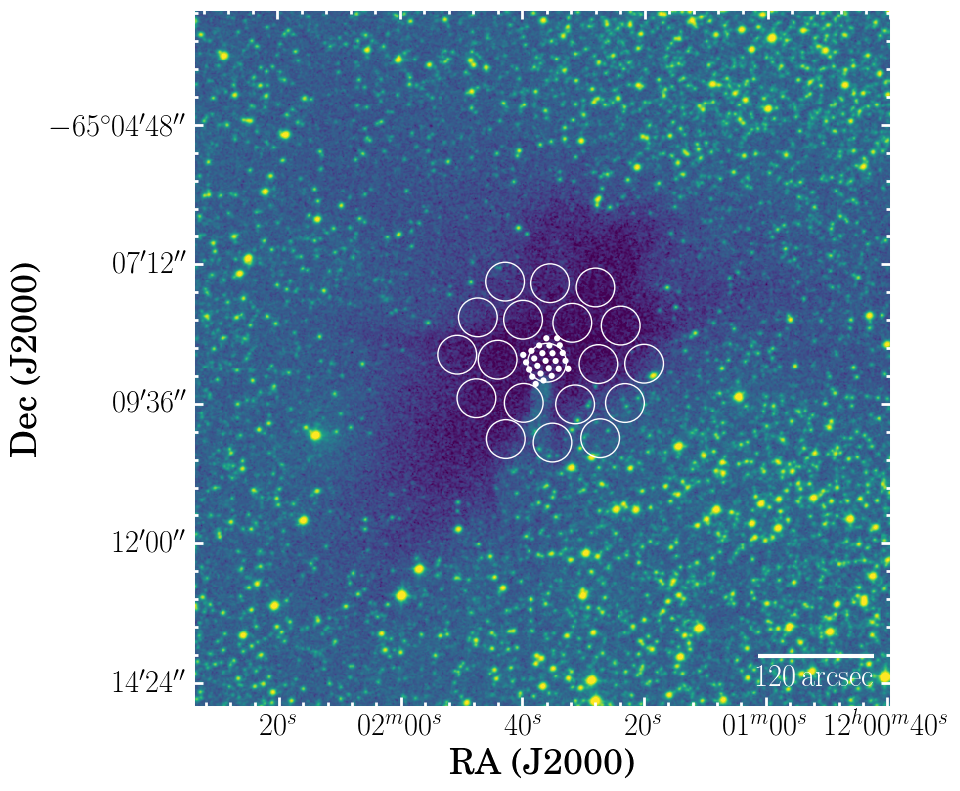

In [61]:
sdss_red = '/Users/yaolun/bhr71/data/bhr71_sdss_red.fits'
size = 0.1
import numpy as np
import aplpy as apl
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord

im = apl.FITSFigure(sdss_red,north=True)
im.frame.set_linewidth(2)
im.frame.set_color('white')
cmap = plt.cm.viridis
im.show_colorscale(cmap=cmap,stretch='log')

# source coordinate from Chen 2008
# 12 01 36.81  -65 08 49.22
irs1 = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
# add label for BHR71 IRS2
irs2 = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))

im.recenter(irs1.ra.degree, irs1.dec.degree,radius=size)

im.set_nan_color('black')
im.tick_labels.set_font(size=22)

# im.add_colorbar()
# im.colorbar.set_font(size=20)
# im.colorbar.set_axis_label_text(r'$\rm{Intensity\,(Jy\,pixel^{-1})}$')
# im.colorbar.set_axis_label_font(size=24)
im.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
im.ticks.set_xspacing(size/2.5)
im.ticks.set_yspacing(size/2.5)
im.axis_labels.set_font(size=26)
im.ticks.set_linewidth(2)
im.ticks.set_color('white')

im.add_scalebar(120/3600.)
im.scalebar.set_length(120 * u.arcsecond)
im.scalebar.set_label(r'$\rm{120\,arcsec}$')
im.scalebar.set_font(size=22, weight='bold')
im.scalebar.set(linestyle='solid', color='w', linewidth=3, corner='bottom')


# plot the footprint of SPIRE spaxel
for coord in pixelcoord_slw:
    im.show_circles([coord[0]], [coord[1]], [40/2./3600.], color='white', linewidth=1)

# plot the footprint of PACS spaxel
for coord in pixelcoord_pacs:
    im.show_markers([coord[0]], [coord[1]], marker='o', facecolor='w', edgecolor='None', s=20, linewidth=1)


im.save('/Users/yaolun/Dropbox/bhr71/for_submission/figures/sdss_red.pdf',format='pdf',transparent=True, dpi=300)